In [90]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import copy
from textblob import TextBlob
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from sklearn.utils import resample
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /home/dhawal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/dhawal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/dhawal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [91]:
df = pd.read_csv("yelp.csv")

df=df.drop(['Unnamed: 10','Unnamed: 11','review_id','date'],axis=1)

df=df.drop(['user_id','business_id','type'],axis=1)

## UPSAMPLE

In [92]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
stemmer

### Coversion in lower case ###

In [93]:
df['text'] = df['text'].str.lower()

### Removal of stop words

In [94]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

stop=stop[0:144]
stop.append('back')
stop.append('n\'t')
stop.append('dice')

### Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.

In [95]:
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#### INCLUSION OF LENGTH OF REVIEW

In [96]:
df['length'] = df['text'].apply(len)

### Review vs Stars

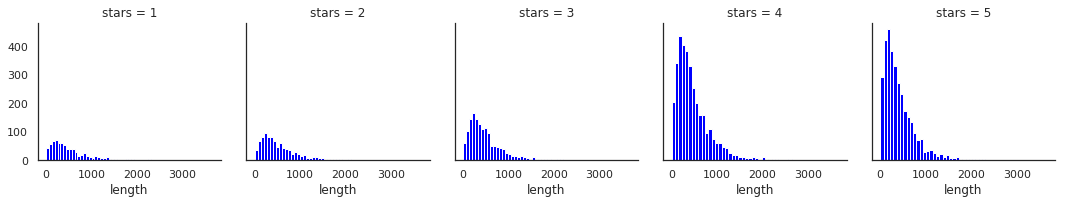

In [97]:
graph = sns.FacetGrid(data=df,col='stars')
graph.map(plt.hist,'length',bins=50,color='blue')

#### Removal of meaningless thing from text

In [98]:
def fun(x):
#     print(x)
    blob=TextBlob(x)
#     print("blob ",blob)
    verb=[]
    s=" "
    for word, tag in blob.tags:
#         print("ffff")
        if tag == 'RB' or tag=='RBR' or tag=='RBS' or tag=='JJ' or tag=='JJR':
            verb.append(word)
    s=s.join(verb)
    return s

In [99]:
def plot_word_cloud(data):
    '''
    Function to plot word cloud from a pandas series
    Input: data: pandas.core.series.Series object
    Output: Wordcloud of most recurrent words in data
        for plots to be in ipython notebook include following line before calling this function
        %matplotlib inline 
    '''
    # take relative word frequencies into account, lower max_font_size
    wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(str(data))
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [100]:
df['text'] = df['text'].apply(fun)

# strv=df.groupby('stars').mean()
# stval.corr()
# strv.mean('cool')
# strv

# strv.corr()

### STEMMING

In [101]:
df['text'] = df['text'].apply(lambda x:' '.join([stemmer.stem(word) for word in x.split() if word in stemmer.stem(word)]))

In [102]:
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [103]:
texts = df['text']
stars = df['stars']

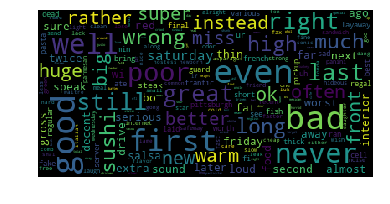

In [104]:
plot_word_cloud(df["text"].loc[df.stars == 1,])

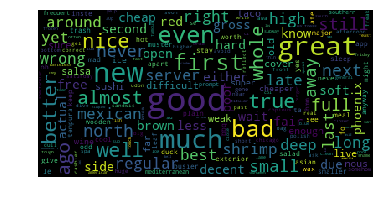

In [105]:
plot_word_cloud(df["text"].loc[df.stars == 2,])

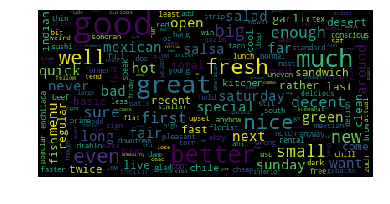

In [106]:
plot_word_cloud(df["text"].loc[df.stars == 3,])

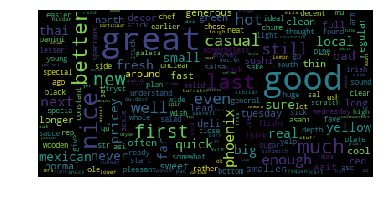

In [107]:
plot_word_cloud(df["text"].loc[df.stars == 4,])

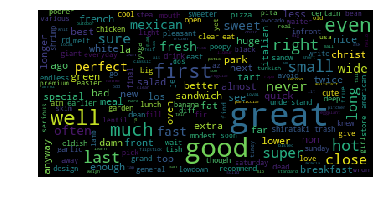

In [108]:
plot_word_cloud(df["text"].loc[df.stars == 5,])

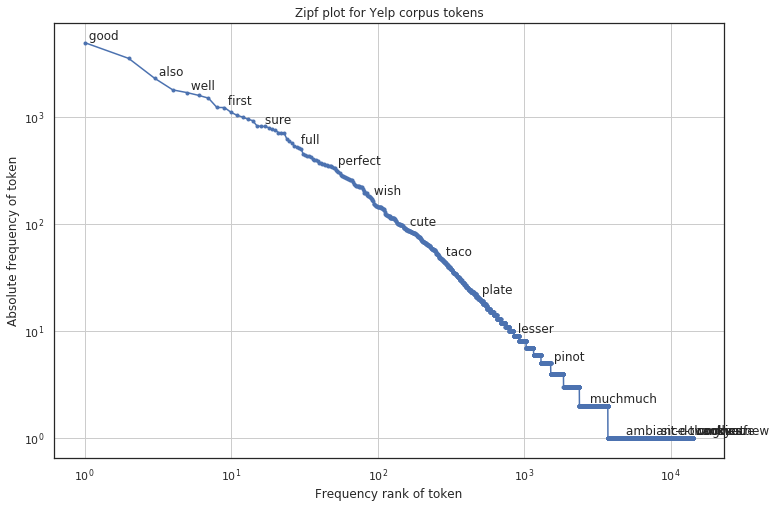

In [109]:
yelp_review_tokens = df.text.sum()
yelp_review_vocabulary = nltk.FreqDist(yelp_review_tokens.split())
yelp_review_vocabulary_counts = np.array(list(yelp_review_vocabulary.values()))
yelp_review_vocabulary_tokens = list(yelp_review_vocabulary.keys())

# A Zipf plot
ranks = np.arange(1, len(yelp_review_vocabulary_counts)+1)
indices = np.argsort(-yelp_review_vocabulary_counts)
frequencies = yelp_review_vocabulary_counts[indices]
fig3 = plt.figure(figsize=(12, 8))
plt.loglog(ranks, frequencies, marker=".")
plt.title("Zipf plot for Yelp corpus tokens")
plt.xlabel("Frequency rank of token")
plt.ylabel("Absolute frequency of token")
plt.grid(True)
for n in list(np.logspace(-0.5, np.log10(len(yelp_review_vocabulary_counts)), 20).astype(int)):
    dummy = plt.text(ranks[n-1], frequencies[n-1], " " + yelp_review_vocabulary_tokens[indices[n-1]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

In [110]:
positive=0
negative=0
count=0
for i in df['text']:
    blob = TextBlob(i)
    feel = blob.sentiment
    if feel.polarity > 0:
        positive = positive + 1
        df.loc[count, 'sentiment'] = feel.polarity
    else:
        negative = negative + 1
        df.loc[count, 'sentiment'] = feel.polarity
    count=count+1

#### REASON FOR BALANCING CAN BE SEEN BY GRAPH SHOWING VARIATION IN COLLECTION OF RATING COUNT ###$

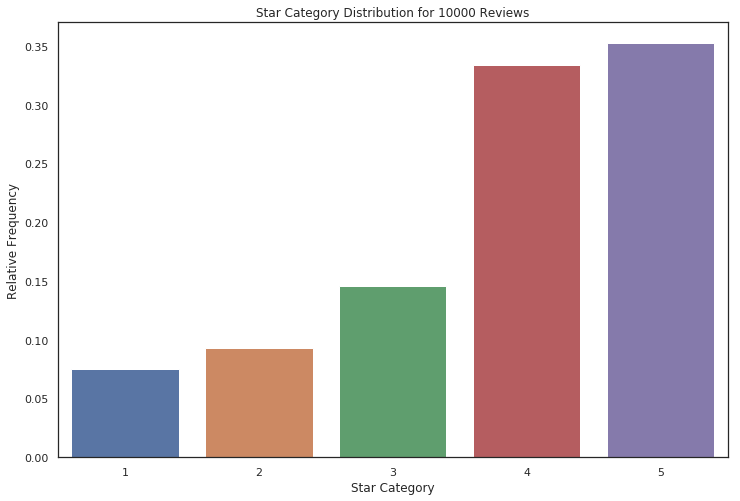

In [111]:
N_star_categories = 5
colors = np.array(['#660000', '#ff4d4d', '#ffb3b3', '#99e699', '#29a329'])
stars_labels = np.array(range(N_star_categories)) + 1;
#star_category_dist_fig = plt.figure(figsize=(12,8))
bar_plot_indices = np.arange(N_star_categories) 
star_category_absolute_frequencies = df.stars.value_counts(ascending=True);
star_category_relative_frequencies = np.array(star_category_absolute_frequencies)/float(sum(star_category_absolute_frequencies))
sns.set()
sns.set(style="white")
fig2 = plt.figure(figsize=(12, 8))
ax = sns.barplot(x=bar_plot_indices + 1, y=star_category_relative_frequencies)
ax.set_xlabel('Star Category');
ax.set_ylabel('Relative Frequency');
ax.set_title('Star Category Distribution for {0} Reviews'.format(len(df)));

In [112]:
stars_1 = df[df['stars']==1]
stars_2 = df[df['stars']==2]
stars_3 = df[df['stars']==3]
stars_5 = df[df['stars']==5]
stars_4 = df[df['stars']==4]

df_minority_upsampled_1 = resample(stars_1, 
                                 replace=True, 
                                 n_samples=3526,
                                 random_state=123)
df_minority_upsampled_2 = resample(stars_2, 
                                 replace=True, 
                                 n_samples=3526,
                                 random_state=123)
df_minority_upsampled_3 = resample(stars_3, 
                                 replace=True, 
                                 n_samples=3526,
                                 random_state=123)
df_minority_upsampled_5 = resample(stars_5, 
                                 replace=True, 
                                 n_samples=3526,
                                 random_state=123)
df_upsampled = pd.concat([stars_4, df_minority_upsampled_1,df_minority_upsampled_2,df_minority_upsampled_3,df_minority_upsampled_5])

we’ll get less biased predictions if we train the system on balanced data. This means that ideally we should have the same number of examples of each review type.

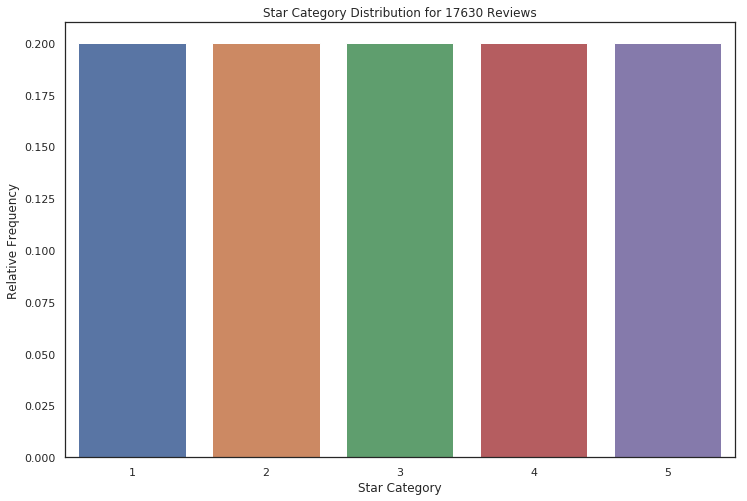

In [113]:
N_star_categories = 5
colors = np.array(['#660000', '#ff4d4d', '#ffb3b3', '#99e699', '#29a329'])
stars_labels = np.array(range(N_star_categories)) + 1;
#star_category_dist_fig = plt.figure(figsize=(12,8))
bar_plot_indices = np.arange(N_star_categories) 
star_category_absolute_frequencies = df_upsampled.stars.value_counts(ascending=True);
star_category_relative_frequencies = np.array(star_category_absolute_frequencies)/float(sum(star_category_absolute_frequencies))
sns.set()
sns.set(style="white")
fig2 = plt.figure(figsize=(12, 8))
ax = sns.barplot(x=bar_plot_indices + 1, y=star_category_relative_frequencies)
ax.set_xlabel('Star Category');
ax.set_ylabel('Relative Frequency');
ax.set_title('Star Category Distribution for {0} Reviews'.format(len(df_upsampled)));

In [114]:
stars = df_upsampled['stars']
print(Counter(stars))
balanced_y = stars
balanced_x = df_upsampled['text']

Counter({4: 3526, 1: 3526, 2: 3526, 3: 3526, 5: 3526})


In [115]:
# df_upsampled
# df_upsampled.reset_index()

### Data bais

In [116]:
# bow_transformer = CountVectorizer(analyzer=text_process).fit(X_train)
# df_upsampled = df_upsampled.loc[:,~df_upsampled.columns.duplicated()]

In [117]:
# df_upsampled
# df_upsampled.reset_index()

In [121]:
df2=df_upsampled[['sentiment','text','stars']]


In [122]:
df2

,sentiment,text,stars
2,0.000000,also,4
5,0.154169,full wooden full even tuesday earlier enough f...,4
7,0.277778,far pleasant next phoenix longer,4
8,0.700000,sake great wait nice plan wish,4
13,0.588889,good clean chose well good,4
14,0.220404,new irish decor wednesday whole good small sal...,4
19,0.425000,better better last ago rep in-flight still asc...,4
25,0.257143,great nice ole real nice sugar smaller easier ...,4
27,0.244643,much in-depth chime nonetheless special yellow...,4
28,0.265000,tuesday casual much long pricey normal salsa h...,4


In [123]:
df2.groupby('stars', as_index=False)['sentiment'].mean()

,stars,sentiment
0,1,0.078205
1,2,0.167125
2,3,0.236194
3,4,0.302714
4,5,0.287660


In [124]:
positive

8468

In [125]:
negative

1532

### TF-IDF ###
### This vectorizer breaks text into single words and bi-grams and then calculates the TF-IDF representation

In [126]:
# vectorizer = TfidfVectorizer(ngram_range=(1,2))
# vectors = vectorizer.fit_transform(balanced_x)
balanced_x.shape

(17630,)

In [127]:
# print(vectors)
# print(vectors.shape[0])
# print(vectors.shape[1])

X_train, X_test, y_train, y_test = train_test_split(df2, balanced_y, test_size=0.20, random_state=42)

In [129]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import FunctionTransformer
# build the pipeline
ppl = Pipeline([
              ('ngram',TfidfVectorizer(ngram_range=(1,2))),
              ('clf',   LinearSVC())
              
      ])

# train the classifier
model = ppl.fit(balanced_x,stars)

# test the classifier
y_test = model.predict(balanced_x)
# class sentiments(BaseEstimator, TransformerMixin):
#     """Takes in dataframe, extracts road name column, outputs average word length"""

#     def __init__(self):
#         pass

#     def average_word_length(self, name):
#         return df2['sentiment']
#         """Helper code to compute average word length of a name"""
# #         return np.mean([len(word) for word in name.split()])

#     def transform(self, df, y=None):
#         """The workhorse of this feature extractor"""
#         return df2['sentiment']

#     def fit(self, df, y=None):
#         """Returns `self` unless something different happens in train and test"""
#         return self

# # pipeline = Pipeline([
# #     ('feats', FeatureUnion([
# #         ('ave', sentiments())
# # #         ('ngram', TfidfVectorizer(ngram_range=(1,2))) # can pass in either a pipeline
# #         # or a transformer
# #     ])),
# #     ('clf', MultinomialNB())  # classifier
# # ])

# class tokenizer1(BaseEstimator, TransformerMixin):
#     """Takes in dataframe, extracts road name column, outputs average word length"""

#     def __init__(self):
#         pass

#     def average_word_length(self, name):
# #         return df2['sentiment']
#         """Helper code to compute average word length of a name"""
# #         return np.mean([len(word) for word in name.split()])

#     def transform(self, df, y=None):
#         """The workhorse of this feature extractor"""
#         return df2['sentiment']

#     def fit(self, df, y=None):
#         """Returns `self` unless something different happens in train and test"""
#         return self
    
# get_text_data = FunctionTransformer(X_train['text'])
# get_numeric_data = FunctionTransformer(X_train['sentiment'])


# process_and_join_features = Pipeline([
#     ('features', FeatureUnion([
#             ('numeric_features', Pipeline([
#                 ('selector', get_numeric_data)
#             ])),
#              ('text_features', Pipeline([
#                 ('selector', get_text_data),
#                 ('vec', CountVectorizer())
#             ]))
#          ])),
#     ('clf',MultinomialNB())
# ])

# model = process_and_join_features.fit(X_train,stars)
# y_test1 = model.predict(X_train)

In [130]:
y_test
print(accuracy_score(y_test, stars))

0.9646057855927397


In [ ]:
# from sklearn.pipeline import Pipeline, FeatureUnion

# pipeline = Pipeline([
#     ('feats', FeatureUnion([
#         ('ngram', ngram_count_pipeline), # can pass in either a pipeline
#         ('ave', AverageWordLengthExtractor()) # or a transformer
#     ])),
#     ('clf', LinearSVC())  # classifier
# ])

### Linear SVC

In [ ]:
classifier = LinearSVC()
classifier.fit(X_train, y_train)

In [ ]:
preds = classifier.predict(X_test)
print(list(preds[:10]))
print(y_test[:10])

In [ ]:
print(accuracy_score(y_test, preds))

In [ ]:
confusion_matrix(y_test, preds)

### NN

In [ ]:
from sklearn.neural_network import MLPClassifier 
clf = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=50, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
clf.fit(X_train, y_train)
y_pred2 = clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred2)*100)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
predmnb = mnb.predict(X_test)

In [ ]:
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#Boosting
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=999999)
gbi.fit(X_train, y_train)
predgbi = gbi.predict(X_test)

In [ ]:
print("Confusion Matrix for Gradient Boosting Classifier:")
print(confusion_matrix(y_test,predgbi))
print("Score:",round(accuracy_score(y_test,predgbi)*100,2))
# print("Classification Report:",classification_report(y_test,predgbi))

### Logistic

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X_train, y_train)
y_test1=clf.predict(X_test)


In [ ]:
y_test

In [ ]:
print(accuracy_score(y_test, y_test1)*100)

### NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train.toarray(),y_train)

In [ ]:
predicted= model.predict(X_test.toarray())

In [ ]:
print(accuracy_score(y_test, predicted)*100)